In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer


In [3]:
df5k_v0 = pd.read_csv('~/Documents/datacamp/WBS-School/moosic/df_audio_features_5000.csv')

# df5k.info()
df5k = df5k_v0.copy()

In [4]:
# remove whitespace from column labels
df5k.columns = df5k.columns.str.replace(' ', '')
df5k_v0.columns = df5k_v0.columns.str.replace(' ', '')



In [5]:
feature_ls = ['danceability','speechiness','energy','valence','liveness','acousticness','instrumentalness','tempo','duration_ms','cluster']
drop_ls = [x for x in df5k.columns if x not in feature_ls]
print(drop_ls)
df5k.drop(drop_ls, axis=1, inplace=True)
# df5k.drop(['name','artist','mode','type','id','html'], axis=1, inplace=True)
df5k

['name', 'artist', 'key', 'loudness', 'mode', 'type', 'time_signature', 'id', 'html']


danceability   energy  speechiness  acousticness  instrumentalness  \
0           0.6580  0.25900       0.0705         0.694          0.000059   
1           0.7420  0.39900       0.0346         0.217          0.000002   
2           0.8510  0.73000       0.3470         0.453          0.000063   
3           0.7050  0.05020       0.0471         0.879          0.000041   
4           0.6510  0.11900       0.0380         0.916          0.000343   
...            ...      ...          ...           ...               ...   
5230        0.2020  0.06940       0.0473         0.917          0.715000   
5231        0.1880  0.10100       0.0442         0.855          0.426000   
5232        0.0596  0.00093       0.0434         0.951          0.969000   
5233        0.1330  0.02080       0.0419         0.883          0.505000   
5234        0.3540  0.04870       0.0323         0.783          0.484000   

      liveness  valence    tempo  duration_ms  
0       0.9750   0.3060  110.376       256213  
1       0.1070   0.6930  125.039       191867  
2       0.1240   0.9050   93.698       152267  
3       0.3860   0.5240  106.802       186227  
4       0.1040   0.4020  120.941       273680  
...        ...      ...      ...          ...  
5230    0.0832   0.0655   87.906       995000  
5231    0.0694   0.0355   83.134       855000  
5232    0.0772   0.0344   71.573       238187  
5233    0.1110   0.0591   67.109       314307  
5234    0.2840   0.2530   64.120       948787  

[5235 rows x 9 columns]

In [7]:
# scaling
# minmax provides distinct groups per 1k sample
minmax_scaled5k = MinMaxScaler().fit_transform(df5k)

# try other scaling method (quantile)

In [8]:
# use elbow method to find optimal inertia

inertia_keys = list(range(1, 30))
inertia_list = []
for c in range(1,30):
    km = KMeans(n_clusters=c)
    km.fit(minmax_scaled5k)
    inertia_list.append(round(km.inertia_))
inertia_dc = dict(zip(inertia_keys,inertia_list))
print(inertia_dc)

{1: 2779, 2: 1834, 3: 1235, 4: 984, 5: 798, 6: 734, 7: 685, 8: 651, 9: 619, 10: 595, 11: 575, 12: 556, 13: 538, 14: 524, 15: 513, 16: 497, 17: 486, 18: 478, 19: 468, 20: 459, 21: 454, 22: 441, 23: 437, 24: 429, 25: 424, 26: 416, 27: 409, 28: 402, 29: 400}


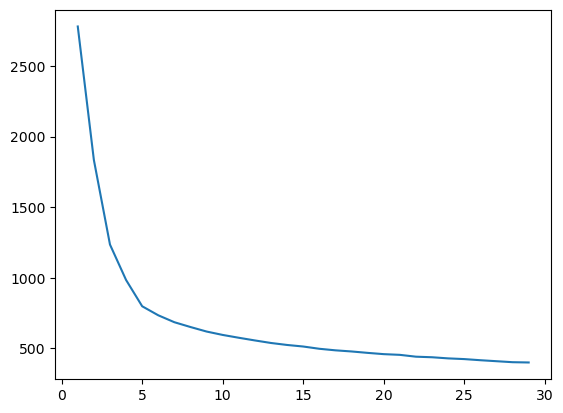

In [9]:
# elbow plot
# observation: k = 4
plt.plot(inertia_keys, inertia_list)
plt.show()

In [10]:
# generate model
clusters = 5
km = KMeans(n_clusters=clusters)
km.fit(minmax_scaled5k)
clust_se = km.predict(minmax_scaled5k)
df5k['cluster'] = clust_se
# display(df5k.head(5))

In [11]:
df5k.max()['cluster'] # max cluster numbers

4.0

In [12]:
# cluster exploration
df5k.columns.values
dim_ls = list(df5k.columns.values)
print(dim_ls)
# set dimension to explore
dimension = dim_ls[7]


['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'cluster']


<class 'pandas.core.series.Series'>


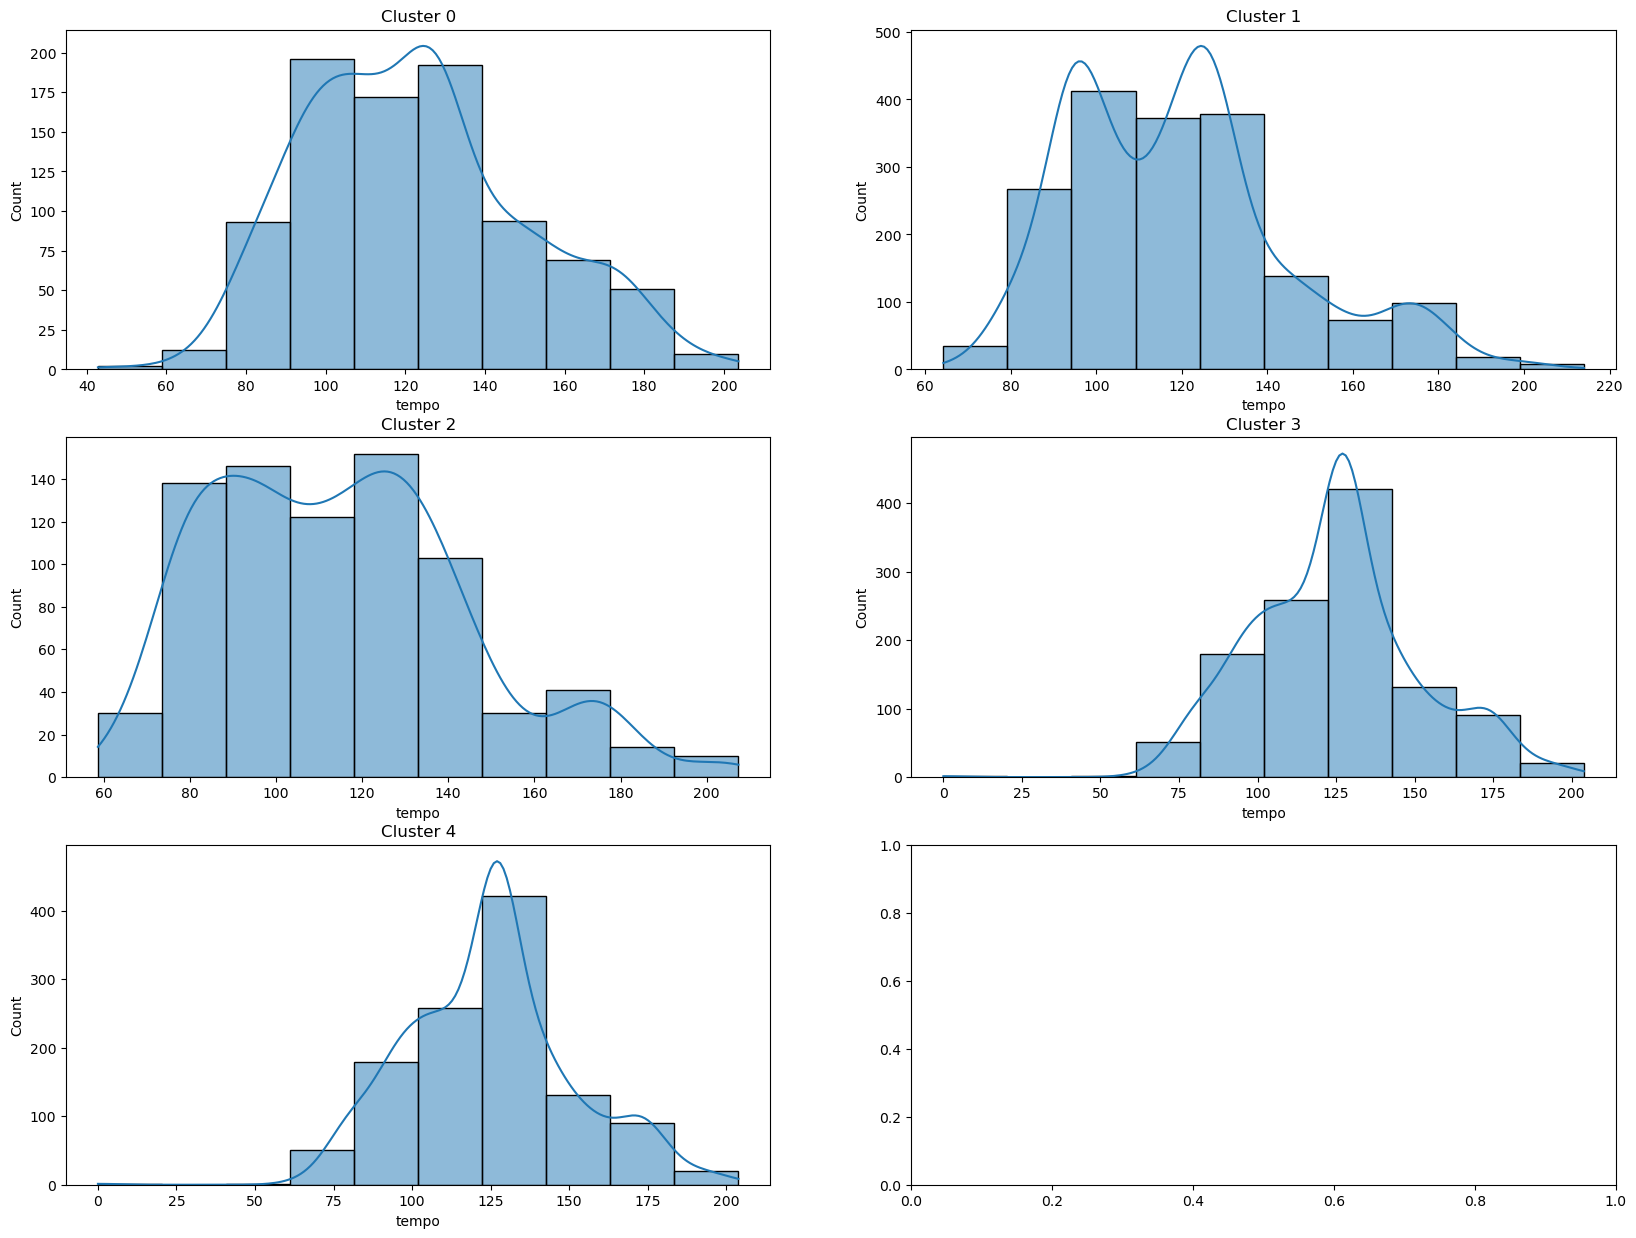

In [111]:


fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# dimension distribution per cluster
s0 = df5k.loc[df5k['cluster']==0][dimension]
s1 = df5k.loc[df5k['cluster']==1][dimension]
s2 = df5k.loc[df5k['cluster']==2][dimension]
s3 = df5k.loc[df5k['cluster']==3][dimension]
s3 = df5k.loc[df5k['cluster']==4][dimension]
# print(type(c0))
sns.histplot(data=s0, bins=10, kde=True,ax=ax[0,0])
sns.histplot(data=s1, bins=10, kde=True,ax=ax[0,1])
sns.histplot(data=s2, bins=10, kde=True,ax=ax[1,0])
sns.histplot(data=s3, bins=10, kde=True,ax=ax[1,1])
sns.histplot(data=s3, bins=10, kde=True,ax=ax[2,0])

# Adding titles to the plots
ax[0,0].set_title('Cluster 0')
ax[0,1].set_title('Cluster 1')
ax[1,0].set_title('Cluster 2')
ax[1,1].set_title('Cluster 3')
ax[2,0].set_title('Cluster 4')


plt.show()

In [108]:
# cluster size plot
# sns.stripplot(x=df5k.cluster,y=df5k[dimension])
# sns.swarmplot(x=df5k.cluster,y=df5k[dimension])

#### Observations: ranking
- danceability: cluster 0,3
- speechiness: cluster 0,3
- acousticness: cluster 0,3,2
- instrumentalness: cluster 0,3,2
- liveness: cluster 0,3, 2
- valence: cluster 0,3,2
- tempo: cluster 0,3,2
- duration_ms: cluster 4,2,0,3

In [13]:
# labeling df with song names
df5k_v0['cluster'] = df5k['cluster']


In [14]:

def get_univar_df(dim):
    # print(dim)
    max = df5k_v0[dim].max()
    q3 = df5k_v0[dim].max() * .75
    q2 = df5k_v0[dim].max() * .25
    min = df5k_v0[dim].min()
    bins = [min,q2,q3,max]
    group_names=[str(min),str(q2)+'-'+str(q3),str(max)]
    df = pd.DataFrame(index=df5k_v0['name'])
    df.reset_index(inplace=True)
    df['name'] = df5k_v0['name']
    df['cluster'] = df5k['cluster']
    df[dim] = df5k[dim]
    df['bins']=pd.cut(df5k[dim],bins,labels=group_names)
    return df

In [15]:
print(dim_ls)

['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'cluster']


In [16]:
dim_ls = sorted(dim_ls)
univar_ls = []
for i in dim_ls:
    df = get_univar_df(i)
    univar_ls.append(df)

d = dict(zip(dim_ls,univar_ls))

<AxesSubplot:xlabel='cluster', ylabel='danceability'>

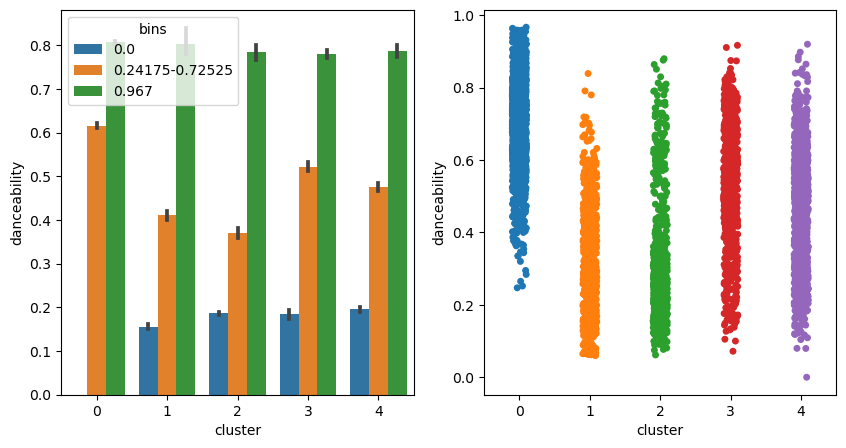

In [18]:
dim = 'danceability'
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='energy'>

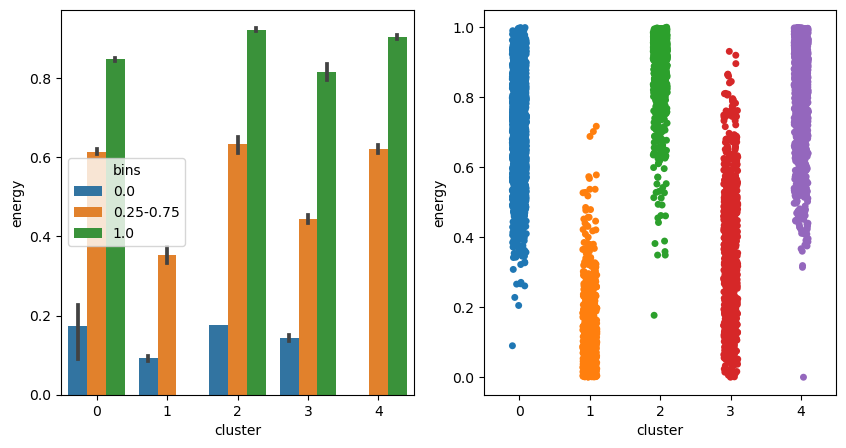

In [19]:
dim = 'energy'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])



<AxesSubplot:xlabel='cluster', ylabel='speechiness'>

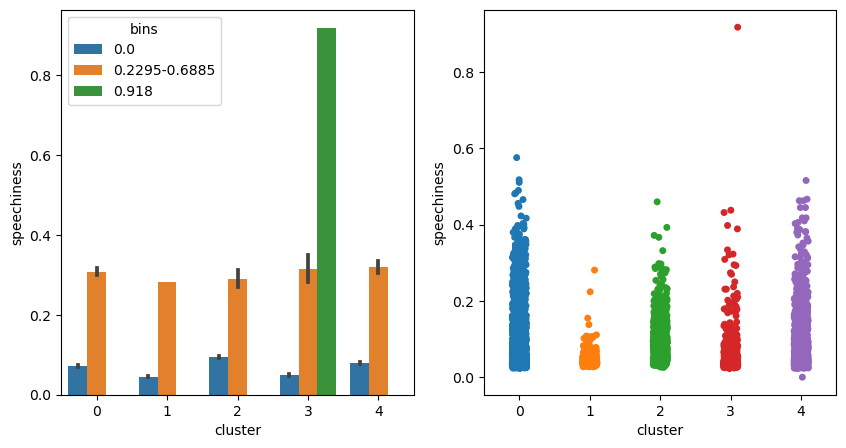

In [20]:
dim = 'speechiness'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='acousticness'>

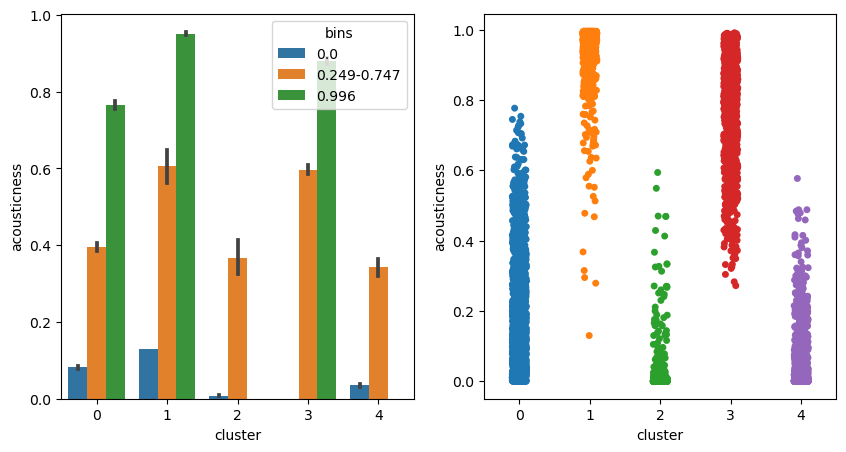

In [21]:
dim = 'acousticness'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='instrumentalness'>

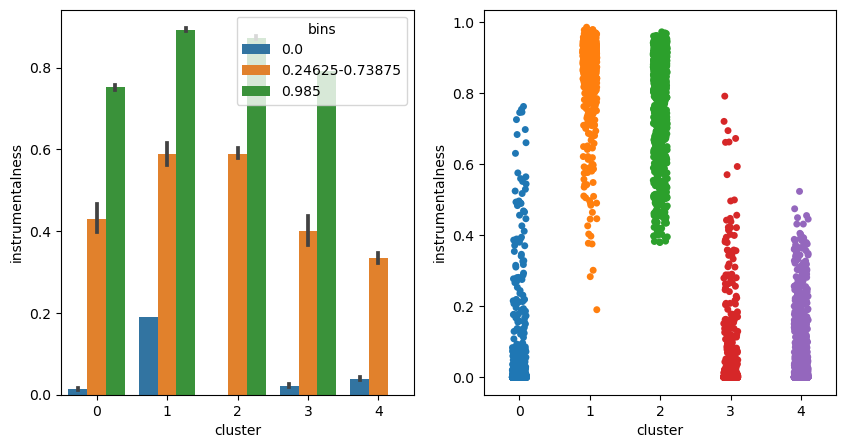

In [22]:
dim = 'instrumentalness'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='liveness'>

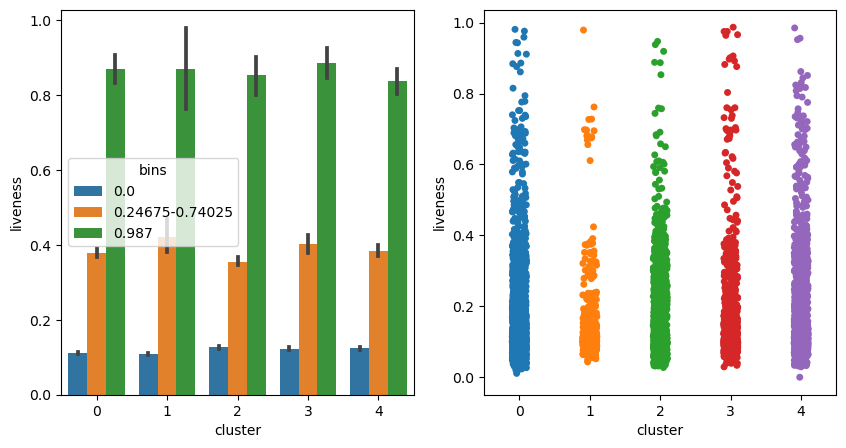

In [23]:
dim = 'liveness'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='valence'>

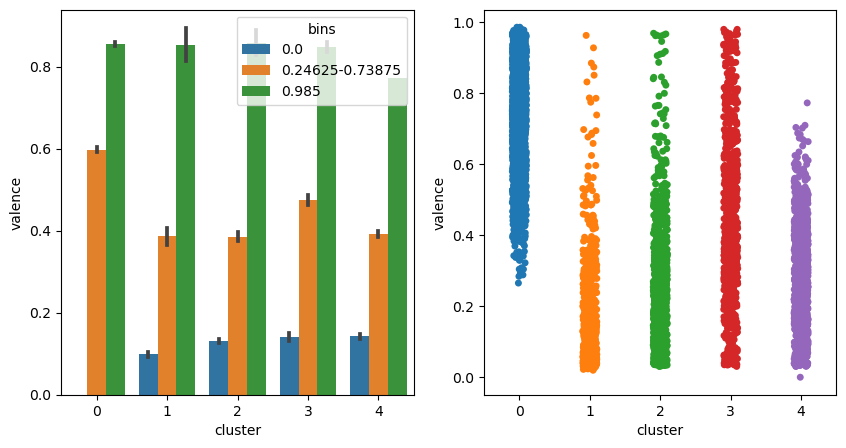

In [24]:
dim = 'valence'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='tempo'>

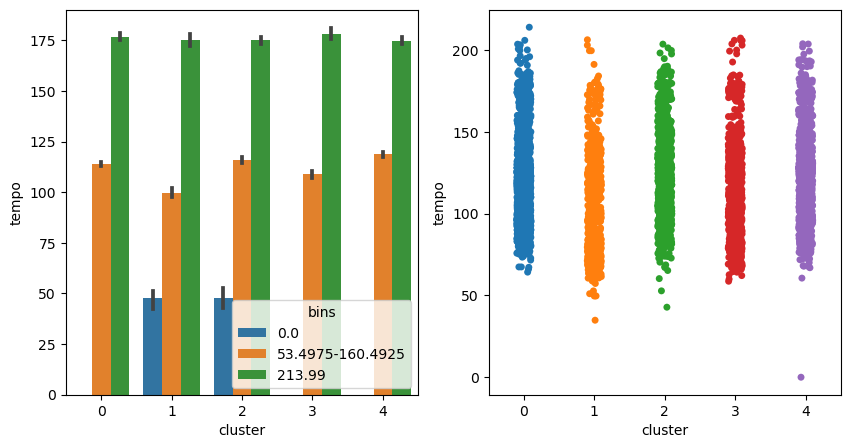

In [29]:
dim = 'tempo'
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='cluster', ylabel='duration_ms'>

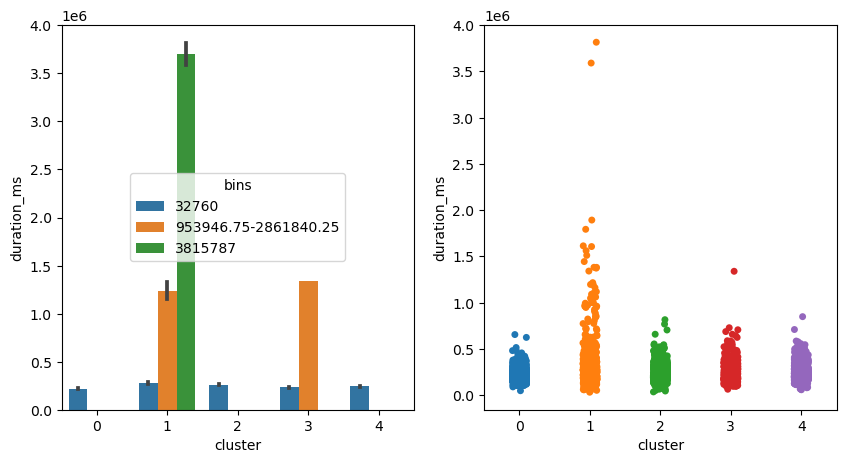

In [26]:
dim = 'duration_ms'
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=d[dim],x='cluster',y=dim,hue='bins',ax=ax[0])
sns.stripplot(x=d[dim].cluster,y=d[dim][dim],ax=ax[1])

<AxesSubplot:xlabel='danceability', ylabel='tempo'>

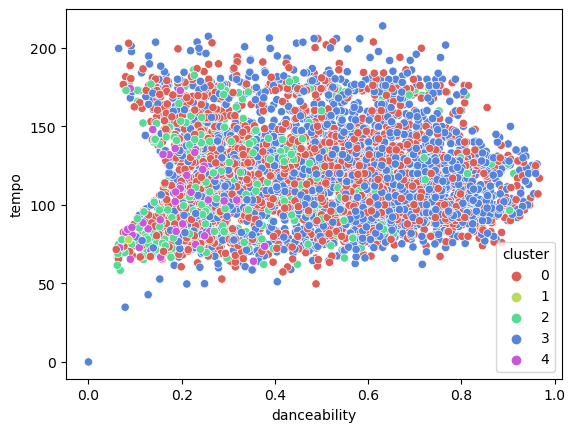

In [28]:
# 2-dimension scatterplot (bivariate)
# examine correlations
sns.scatterplot(x='danceability',y='tempo',hue='cluster',palette=sns.color_palette("hls",clusters),data=df5k,legend="full")


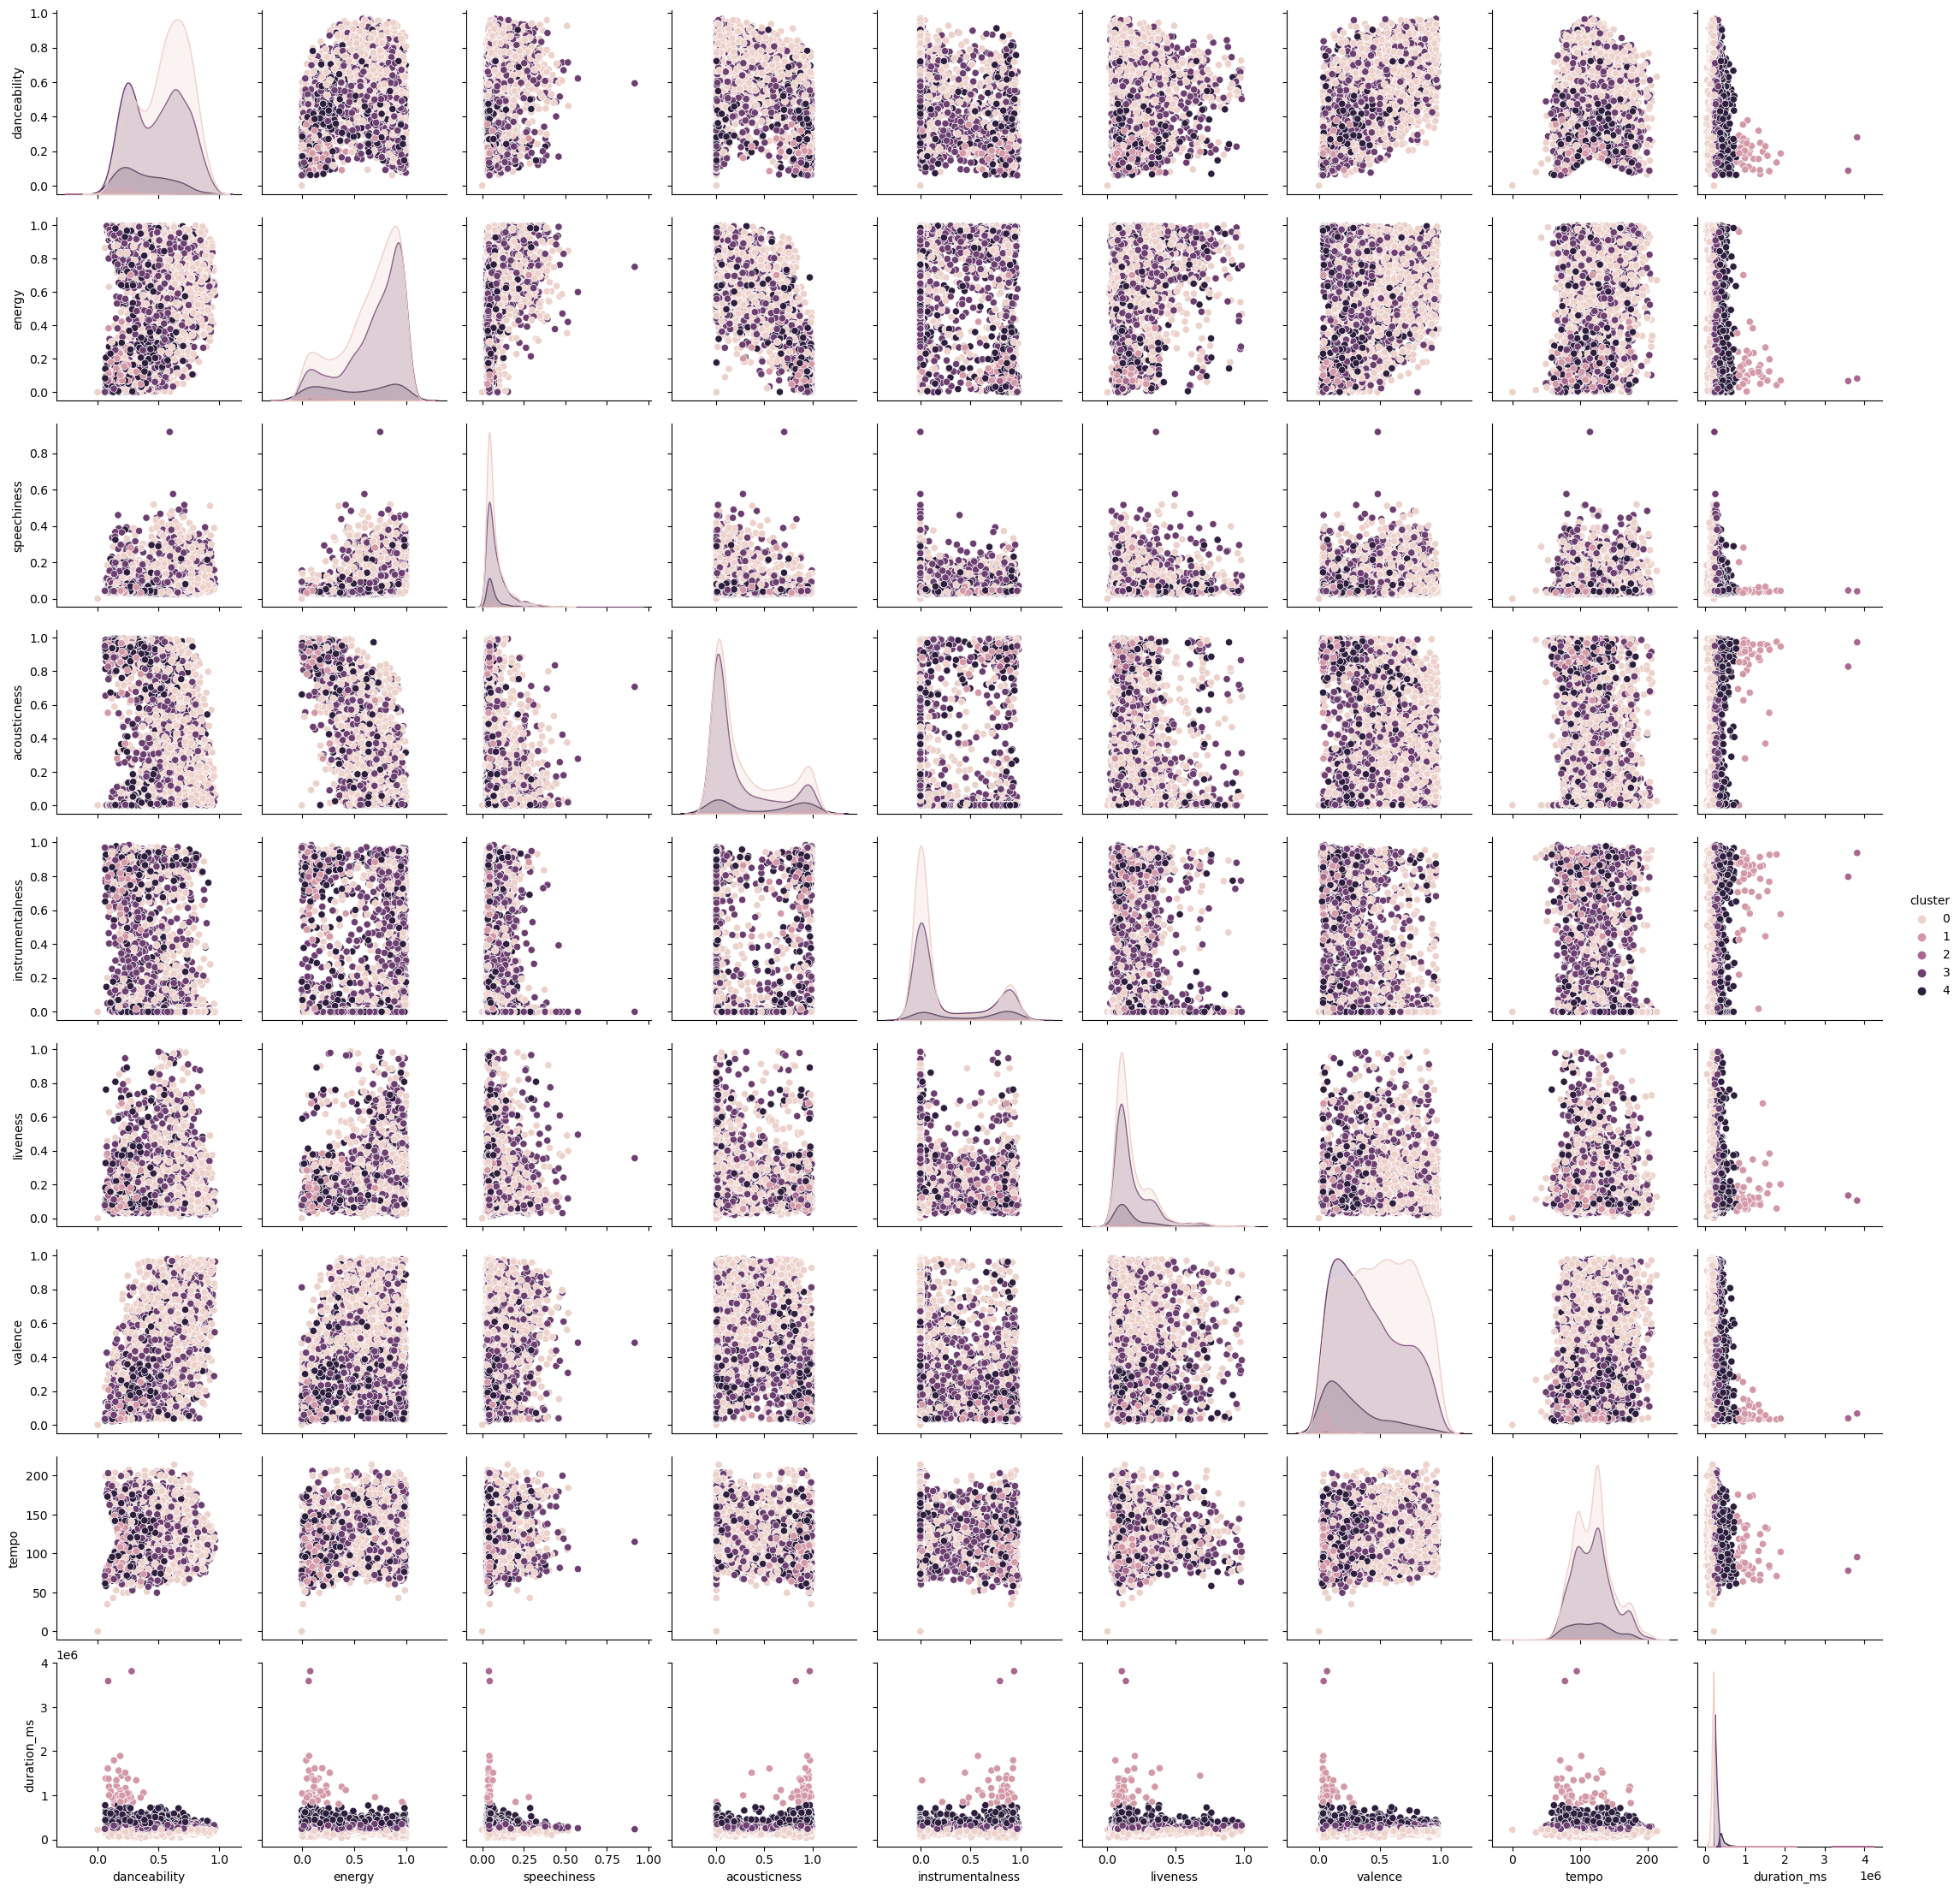

In [72]:
sns.pairplot(df5k,hue='cluster')

In [29]:
# manual verficiation of features per cluster
df5k_v0.loc[df5k_v0['cluster']==0][['name','artist','html','cluster']].sample(5).sample(5)



name  \
4413  A Silent as the Grave                         ...   
1147  Born to Run                                   ...   
2078  Liebestraum, S. 541, No. 3                    ...   
3297  Se Siente Bien                                ...   
2045  Piano Sonata No. 14 (quasi una Fantasia) in C-...   

                                                artist  \
4413  Wombbath                                           
1147  Bruce Springsteen                                  
2078  Franz Liszt                                        
3297  Dragon & Caballero                                 
2045  Ludwig van Beethoven                               

                                                   html  cluster  
4413  https://open.spotify.com/track/2y3xOvaPjZeUDfX...        0  
1147  https://open.spotify.com/track/6hTcuIQa0sxrrBy...        0  
2078  https://open.spotify.com/track/5kOXNkG9ZWAn69s...        0  
3297  https://open.spotify.com/track/52xtApt0X5IZpV8...        0  
2045  https://open.spotify.com/track/7GAGE2KQ0I548pZ...        0

### Business questions

1. Are Spotify's audio features able to identify 'similar songs', as defined by humanly detectable criteria?
There are non-human detectable features that could be relevant to classification (bpm, acoustics, background beats)


2. Is K-Means a good method to create playlists?
Drawbacks of kmeans for classification use cases

### Observations
- k-means is a good start for preprocessing data with high number of dimensions
- further analysis of dimensions should be considered
- large clusters requires further subgrouping
- distinct clusters vs proportional subgrouping of distinct range of dimension 
- kmeans cannot create playlists due to its nature of grouping items using distance between tuples as a classification method
- its possible to create playlists with more sophisticated classification methods


